In [139]:
import warnings
warnings.filterwarnings('ignore')

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
%matplotlib inline 

In [141]:
df = pd.read_csv('/Users/soaadaljafr/Downloads/superstore_dataset2011-2015.csv') 


In [142]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [143]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [144]:
df.head()
df.columns
df.dtypes


Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [145]:
df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [146]:
df.shape

(51290, 24)

In [147]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [148]:
df.City.unique

<bound method Series.unique of 0        Constantine
1        Wagga Wagga
2           Budapest
3          Stockholm
4        Wagga Wagga
            ...     
51285      Fairfield
51286         Agadir
51287        Managua
51288         Ju�rez
51289       Loveland
Name: City, Length: 51290, dtype: object>

In [149]:
df.rename(columns={'Customer ID' : 'Customer_ID'}, inplace=True)

In [150]:
df.Customer_ID.unique

<bound method Series.unique of 0        TB-11280
1        JH-15985
2          AT-735
3        EM-14140
4        JH-15985
           ...   
51285    EB-13975
51286     LP-7095
51287    CM-12190
51288    TD-20995
51289    JM-15580
Name: Customer_ID, Length: 51290, dtype: object>

In [151]:
df.Customer_ID.tail()

51285    EB-13975
51286     LP-7095
51287    CM-12190
51288    TD-20995
51289    JM-15580
Name: Customer_ID, dtype: object

In [152]:
df['Customer_ID'].max()

'ZD-21925'

In [153]:
#What is the best salling catogry our customer like?


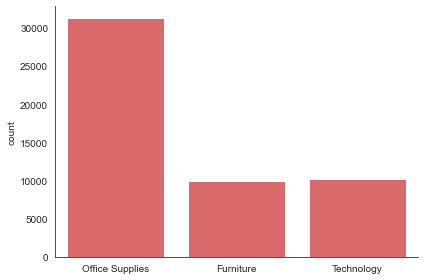

In [154]:
sns.countplot(x='Category',  data=df,  palette=['#EC5856']);
sns.set_style('white')
sns.despine()
plt.xlabel('')
plt.tight_layout();

In [155]:
#df.groupby(['Sales','Quantity']).size().unstack().plot(kind='bar',stacked=False,color=['#BA9603','#E6BA06','#FFCE00'])
#plt.show(5)

In [156]:
#df.boxplot(by = 'Sales');

In [157]:
df.groupby('Category').sum()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Category,,,,,,,
Furniture,241487920,118196026.0,4.110874e+06,34954,1660.030,285204.72380,440320.66
Office Supplies,815386724,330772872.0,3.787070e+06,108182,4297.190,518473.83430,405451.29
Technology,258483051,102603754.0,4.744557e+06,35176,1372.508,663778.73318,507048.74


In [158]:
df.Category.value_counts()#.agg('max')


Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [198]:
df.Category.unique

<bound method Series.unique of 0        Office Supplies
1        Office Supplies
2        Office Supplies
3        Office Supplies
4              Furniture
              ...       
51285    Office Supplies
51286    Office Supplies
51287    Office Supplies
51288    Office Supplies
51289    Office Supplies
Name: Category, Length: 51290, dtype: object>

In [160]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer_ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,2014-12-31,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,2014-12-31,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Dra�,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,2014-12-31,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,2014-12-31,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Ju�rez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [161]:
df2 = df.sort_values(by="Category", ascending=False).head()

In [162]:
name = df['Category']
pp1 = df['Quantity']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))


# Show Plot
plt.show()

<Figure size 720x504 with 0 Axes>

In [163]:
#what the best product comes Profit to the company?

In [164]:
df.rename(columns={'Product Name' : 'Product_Name'}, inplace=True)

In [165]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer_ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,2014-12-31,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,2014-12-31,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Dra�,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,2014-12-31,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,2014-12-31,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Ju�rez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [166]:
df.Profit.unique

<bound method Series.unique of 0        106.1400
1         36.0360
2         29.6400
3        -26.0550
4         37.7700
           ...   
51285      4.5188
51286      0.4200
51287     12.3600
51288      0.5600
51289     -0.6048
Name: Profit, Length: 51290, dtype: float64>

In [167]:
df.Profit.isna().sum()

0

In [168]:
df.groupby(["Product_Name"])['Profit'].max().reset_index().sort_values('Profit',ascending = False).head(15)

,Product_Name,Profit
866,Canon imageCLASS 2200 Advanced Copier,8399.9760
1498,GBC Ibimaster 500 Manual ProClick Binding System,4946.3700
1974,Ibico EPK-21 Electric Binding System,4630.4755
1926,"Hoover Stove, Red",3979.0800
1429,Fellowes PB500 Electric Punch Plastic Comb Bin...,3177.4750
2990,"Samsung Smart Phone, VoIP",2939.3100
311,"Apple Smart Phone, with Caller ID",2817.9900
1647,HP Designjet T520 Inkjet Large Format Printer ...,2799.9840
865,"Canon Wireless Fax, Laser",2597.2800
1769,Hewlett Packard LaserJet 3310 Copier,2591.9568


In [169]:
S= df["Product_Name"].apply(lambda x:"Canon Copier" if "Canon imageCLASS 2200 Advanced Copier" in x else x)
df["Product_Name"]=S

In [170]:
O=df["Product_Name"].apply(lambda x:"GBC System" if "GBC Ibimaster 500 Manual ProClick Binding System" in x else x)
df["Product_Name"]=O

In [171]:
a=df["Product_Name"].apply(lambda x:"Ibico System" if "Ibico EPK-21 Electric Binding System" in x else x)
df["Product_Name"]=a

In [172]:
d=df["Product_Name"].apply(lambda x:"Hoover Stove" if "Hoover Stove, Red" in x else x)
df["Product_Name"]=d

In [173]:
l=df["Product_Name"].apply(lambda x:"Fellowes Punch Plastic" if "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind" in x else x)
df["Product_Name"]=l

In [174]:
j=df["Product_Name"].apply(lambda x:"Samsung Smart Phone" if "Samsung Smart Phone, VoIP" in x else x)
df["Product_Name"]=j

In [175]:
df.rename(columns={'Customer ID' : 'Customer_ID'}, inplace=True)

In [176]:
df.Profit.value_counts()

 0.0000     668
 4.3200      70
 3.9600      69
 7.9200      67
 2.6400      63
           ... 
 66.0736      1
-6.1650       1
-2.2140       1
 20.8400      1
 2.3571       1
Name: Profit, Length: 24575, dtype: int64

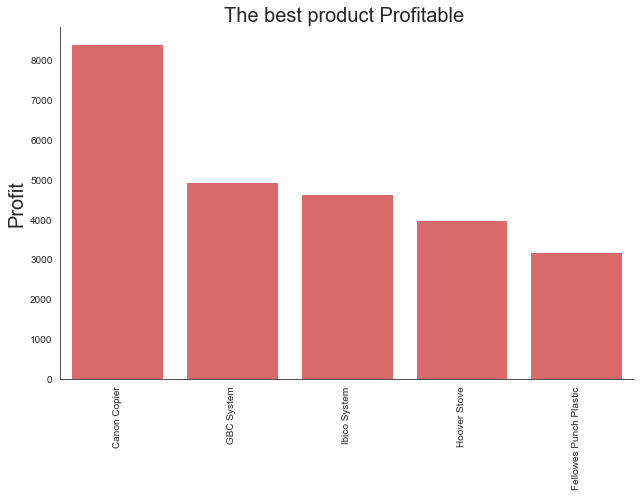

In [177]:
best = df.groupby(["Product_Name"])['Profit'].max().reset_index().sort_values('Profit',ascending = False).head(5)
fig = plt.figure(figsize =(9, 7))
plt.title('The best product Profitable ',fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Product_Name',fontsize=20)
plt.ylabel('Profit',fontsize=20)
sns.barplot(x = "Product_Name",y= "Profit",data=best, palette=['#EC5856'])
sns.set_style('white')
sns.despine()
plt.xlabel('')
plt.tight_layout();




In [178]:
year = df['Order Date'].dt.year
year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
51285    2014
51286    2014
51287    2014
51288    2014
51289    2014
Name: Order Date, Length: 51290, dtype: int64

In [179]:
df['years']=df['Order Date'].dt.year  

In [180]:
best_year = df.groupby(['years'])['Profit'].value_counts()
best_year

years  Profit   
2011   0.0000       120
       2.8800        14
       6.8400        13
       2.6400        12
       4.3200        11
                   ... 
2014   2597.2800      1
       3919.9888      1
       3979.0800      1
       5039.9856      1
       6719.9808      1
Name: Profit, Length: 33980, dtype: int64

In [181]:
df1 =df.groupby('years').sum('Profit')
df1

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
years,,,,,,,
2011,235388025,113271247.0,2.259451e+06,31443,1333.394,248940.81154,244271.08
2012,277692065,111208247.0,2.677439e+06,38111,1548.774,307415.27910,283491.89
2013,347629160,140529941.0,3.405746e+06,48136,1935.522,406935.23018,364549.95
2014,454648445,186563217.0,4.299866e+06,60622,2512.038,504165.97046,460507.77


In [182]:
year = df['Order Date'].dt.year
year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
51285    2014
51286    2014
51287    2014
51288    2014
51289    2014
Name: Order Date, Length: 51290, dtype: int64

In [183]:
type(df1.index)

pandas.core.indexes.numeric.Int64Index

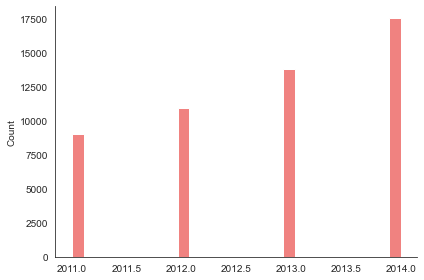

In [184]:
sns.set_style('white')
sns.histplot(df.years,color='#EC5856')
sns.despine()
plt.xlabel('')
plt.tight_layout();

In [185]:
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer_ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,years
49041,21343,IN-2013-26519,2013-03-30,1/4/2013,First Class,DR-12940,Daniel Raglin,Home Office,Sydney,New South Wales,...,Office Supplies,Paper,"SanDisk Memo Slips, Multicolor",49.653,3,0.1,1.0530,0.06,Medium,2013
32687,5753,US-2011-102323,2011-08-20,24-08-2011,Standard Class,GH-14425,Gary Hwang,Consumer,San Miguelito,Panama,...,Office Supplies,Envelopes,"GlobeWeis Peel and Seal, Recycled",32.304,4,0.4,2.6240,2.13,Medium,2011
37653,6497,MX-2011-121524,2011-07-23,26-07-2011,First Class,GM-14500,Gene McClure,Consumer,Rol�ndia,Parana,...,Office Supplies,Paper,"Green Bar Computer Printout Paper, Multicolor",124.680,6,0.0,9.9600,47.82,Critical,2011
18018,39622,CA-2014-144456,2014-09-09,10/9/2014,First Class,FC-14245,Frank Carlisle,Home Office,Hialeah,Florida,...,Technology,Phones,Samsung Rugby III,158.376,3,0.2,13.8579,20.40,High,2014
38949,33896,CA-2014-108553,2014-04-24,30-04-2014,Standard Class,SK-19990,Sally Knutson,Consumer,New York City,New York,...,Office Supplies,Appliances,Tripp Lite Isotel 6 Outlet Surge Protector wit...,121.940,2,0.0,35.3626,8.48,Medium,2014


In [186]:
df.City.unique

<bound method Series.unique of 0        Constantine
1        Wagga Wagga
2           Budapest
3          Stockholm
4        Wagga Wagga
            ...     
51285      Fairfield
51286         Agadir
51287        Managua
51288         Ju�rez
51289       Loveland
Name: City, Length: 51290, dtype: object>

In [187]:
df['City'] = df['City'].str.replace('[^A-Za-z0-9 ]', "")

In [188]:
df.City.unique

<bound method Series.unique of 0        Constantine
1        Wagga Wagga
2           Budapest
3          Stockholm
4        Wagga Wagga
            ...     
51285      Fairfield
51286         Agadir
51287        Managua
51288          Jurez
51289       Loveland
Name: City, Length: 51290, dtype: object>

In [189]:
df.City.value_counts()

New York City     915
Los Angeles       747
Philadelphia      537
San Francisco     510
Santo Domingo     443
                 ... 
Kurashiki           1
Norfolk             1
Torremolinos        1
Melchor Ocampo      1
Cedar Rapids        1
Name: City, Length: 3635, dtype: int64

In [190]:
df.State.value_counts().head(15)

California                2001
England                   1499
New York                  1128
Texas                      985
Ile-de-France              981
New South Wales            781
North Rhine-Westphalia     719
Queensland                 717
San Salvador               615
Pennsylvania               587
National Capital           583
Washington                 506
Illinois                   492
Victoria                   491
Distrito Federal           469
Name: State, dtype: int64

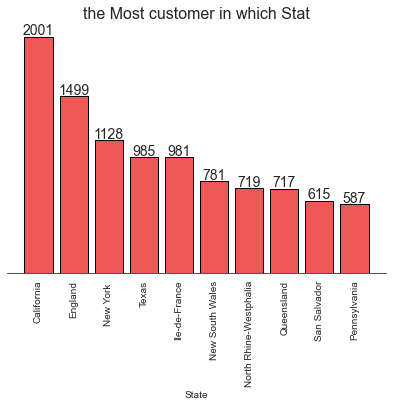

In [191]:
State = ['California', 'England', 'New York ', 'Texas', 'Ile-de-France','New South Wales','North Rhine-Westphalia','Queensland','San Salvador','Pennsylvania']
counts = [2001, 1499, 1128, 985, 981, 781, 719, 717,615,587]

plt.bar(State, counts, edgecolor='black', color='#EC5856')

for i, g in enumerate(counts):
    plt.text(i, g+13, f'{g}', ha='center', fontsize=14)
    
    
sns.set_style('white')
sns.despine()
plt.xlabel('')
plt.tight_layout();    
plt.xlabel('State')
plt.xticks(rotation=90)
plt.yticks([])
plt.title('the Most customer in which Stat',fontsize=16)

sns.despine(left=True)

In [192]:
df2 = df.City.value_counts().agg(max)

In [193]:
#sns.pairplot(df)